<a href="https://colab.research.google.com/github/saivarshi/CNN/blob/main/Image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape #2d array

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

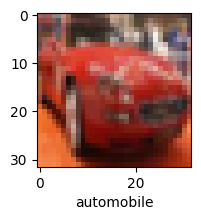

In [25]:
plot_sample(x_train,y_train,5)

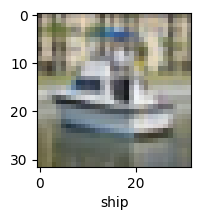

In [26]:
plot_sample(x_train,y_train,501)

In [27]:
#normalizing
x_train = x_train / 255.0
x_test = x_test / 255.0

In [47]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = "relu"),
    layers.Dense(1000,activation = "relu"),
    layers.Dense(10,activation = "softmax")
])
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)
ann.compile(loss = "sparse_categorical_crossentropy",
            optimizer=sgd_optimizer,
            metrics = ["accuracy"])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8145 - accuracy: 0.3514
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.6263 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5444 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4844 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4359 - accuracy: 0.4952


In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 9s 28ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.58      0.37      0.46      1000
           1       0.50      0.69      0.58      1000
           2       0.44      0.14      0.22      1000
           3       0.39      0.19      0.26      1000
           4       0.32      0.63      0.42      1000
           5       0.45      0.31      0.36      1000
           6       0.55      0.46      0.50      1000
           7       0.67      0.38      0.48      1000
           8       0.39      0.81      0.53      1000
           9       0.49      0.51      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



In [52]:
import seaborn as sns

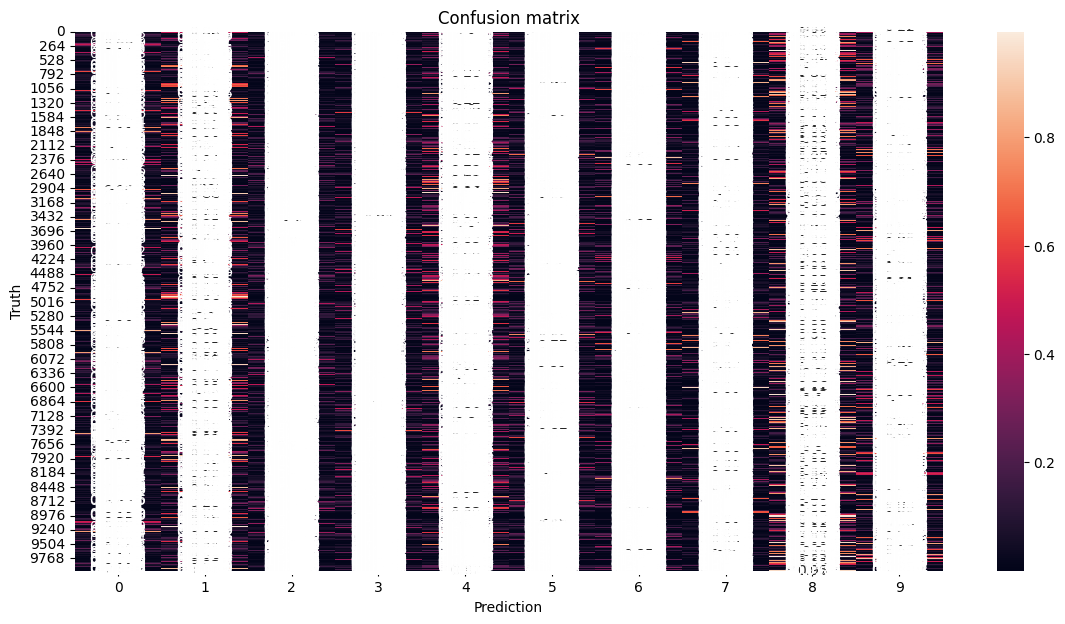

In [54]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot = True)
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.title("Confusion matrix")
plt.show()

In [57]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 ,kernel_size=(3,3),activation = "relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10,activation = "softmax")
])

In [60]:
adam_optimizer = keras.optimizers.Adam()
cnn.compile(loss = "sparse_categorical_crossentropy",
            optimizer=adam_optimizer,
            metrics = ["accuracy"])

In [62]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4770 - accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1174 - accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9750 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8937 - accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8382 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7816 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7406 - accuracy: 0.7436
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6937 - accuracy: 0.7598
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6586 - accuracy: 0.7688
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [63]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9361 - accuracy: 0.6946


[0.9361035227775574, 0.694599986076355]

In [64]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[6.0475408e-04, 2.3901033e-04, 1.0289367e-03, 9.0889299e-01,
        9.4898001e-05, 5.9222117e-02, 1.0663769e-03, 3.4449864e-04,
        2.8483456e-02, 2.2890426e-05],
       [2.6008004e-04, 8.8899624e-01, 1.8948624e-07, 9.6769860e-08,
        4.4689316e-10, 3.8052850e-09, 1.2537169e-11, 1.8547545e-11,
        1.1013800e-01, 6.0546101e-04],
       [4.6486589e-01, 2.4692684e-01, 1.2571486e-03, 1.3527991e-02,
        5.1822723e-04, 3.6121176e-03, 1.1318168e-04, 1.3190412e-03,
        1.7213371e-01, 9.5725849e-02],
       [9.9388534e-01, 8.9553854e-05, 1.5817373e-03, 9.7812790e-06,
        4.7710128e-06, 7.8056516e-08, 8.3687972e-08, 1.0772524e-06,
        4.3864716e-03, 4.1132880e-05],
       [1.2706428e-06, 5.5442502e-05, 1.7318820e-03, 3.6421441e-03,
        2.9674083e-02, 1.5287858e-04, 9.6471560e-01, 9.0917405e-07,
        2.5704840e-05, 6.9647221e-08]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 6]

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

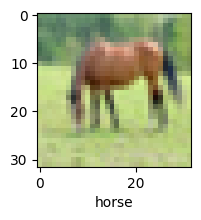

In [67]:
plot_sample(x_test,y_test,60)

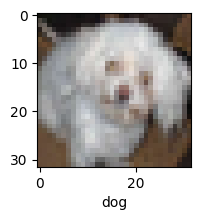

In [71]:
plot_sample(x_test,y_test,1000)

In [73]:
classes[y_classes[60]]

'horse'